In [55]:
import pandas as pd

leases = pd.read_csv('../data/Leases.csv')
availability = pd.read_csv('../data/Price and Availability Data.csv')
addresses = pd.read_csv('../data/address_info.csv')

In [82]:
leases.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing'],
      dtype='object')

In [96]:
grouped = leases[leases['internal_industry'].fillna('').str.contains('Technology')].groupby(['year', 'market'])['leasedSF'].sum().reset_index()

major_markets = leases.groupby('market')['leasedSF'].sum().reset_index().sort_values('leasedSF', ascending=False).head(20)

print(major_markets)

# target_cities = grouped[grouped['city'].isin(cities)]

                 market     leasedSF
12            Manhattan  221942535.0
11          Los Angeles   89746179.0
7       Dallas/Ft Worth   82447515.0
10              Houston   78428717.0
3                Boston   75165935.0
15    Northern Virginia   66257821.0
5               Chicago   64093554.0
28      Washington D.C.   56505228.0
0               Atlanta   55435166.0
14  Northern New Jersey   51823645.0
8                Denver   47648834.0
25        South Florida   45238936.0
23              Seattle   44347304.0
16        Orange County   43659066.0
22        San Francisco   43472765.0
18              Phoenix   38927086.0
17         Philadelphia   37529146.0
24   South Bay/San Jose   37349078.0
6       Chicago Suburbs   36583682.0
1                Austin   36427150.0


/var/folders/c8/dbdw2j4520v2j_24dy3bc4580000gn/T/ipykernel_13991/3617419585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_cities['relativeSF'] = target_cities.apply(lambda x: x['leasedSF'] / target_cities[(target_cities['year'] == 2018) & (target_cities['city'] == x['city'])]['leasedSF'].values[0], axis=1)


<Axes: title={'center': 'Leased space by city (relative to 2018 baseline)'}, xlabel='Year', ylabel='Leased space'>

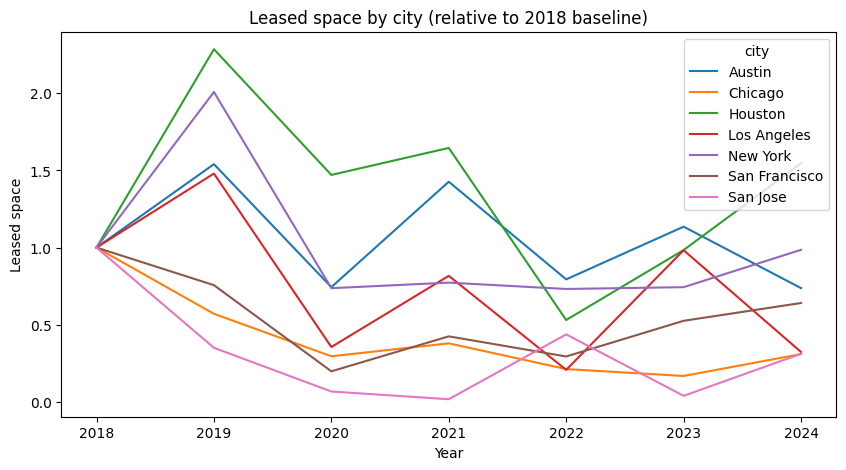

In [90]:
# Plot the above data with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Leased space')
plt.title('Leased space by city (relative to 2018 baseline)')

target_cities['relativeSF'] = target_cities.apply(lambda x: x['leasedSF'] / target_cities[(target_cities['year'] == 2018) & (target_cities['city'] == x['city'])]['leasedSF'].values[0], axis=1)

sns.lineplot(data=target_cities, x="year", y="relativeSF", hue="city")

In [ ]:
grouped.to_csv('../data/tech_lease_')